# MODULE - 2 : Data Wrangling

## Hands-on Practice Lab: Data Wrangling (User-cars Pricing)

Estimated time needed: 30 minutes
Objectives

After completing this lab you will be able to:

    Handle missing values
    Correct data formatting
    Standardize and normalize data


What is the purpose of data wrangling?

You use data wrangling to convert data from an initial format to a format that may be better for analysis.
What is the fuel consumption (L/100k) rate for the diesel car?
Import data

You can find the "Automobile Dataset" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. You will be using this data set throughout this course.


In [64]:
# %pip install pandas
# %pip install matplotlib
 
import pandas as pd
import matplotlib.pylab as plt

Reading the dataset from the URL and adding the related headers

The functions below will download the dataset into your browser:


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

# Column headers for the dataset
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# Read CSV directly from URL (pandas can handle URLs directly)
df = pd.read_csv(file_path, names=headers)

# Display first few rows
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

### Identify and handle missing values
Identify missing values
Convert "?" to NaN
In the car data set, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function:

.replace(A, B, inplace = True) 

to replace A by B. 

In [66]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

### Evaluating for Missing Data

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:

    .isnull()
    .notnull()

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. 

In [67]:
missing_data = df.isnull()
missing_data.head(5)

# "True" means the value is a missing value while "False" means the value is not a missing value.


symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   
3       False         False            False       False  ...        False   
4       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        False  False   False              False       False     False   
1        False  False   False              False       False     False   
2        False  False   False              False       False     False   
3        False  False   False              False       False     False   
4        False  False   False              False       False     False   

   city-mpg  highway-mpg  price  
0     False        False  False  
1     False        False  False  
2     False        False  False  
3     False        False  False  
4     False        False  False  

[5 rows x 26 columns]

### Count missing values in each column

Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set. In the body of the for loop the method ".value_counts()" counts the number of "True" values.


In [68]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

    "normalized-losses": 41 missing data
    "num-of-doors": 2 missing data
    "bore": 4 missing data
    "stroke" : 4 missing data
    "horsepower": 2 missing data
    "peak-rpm": 2 missing data
    "price": 4 missing data



### Deal with missing data

How should you deal with missing data?

    Drop data
    a. Drop the whole row
    b. Drop the whole column
    Replace data
    a. Replace it by mean
    b. Replace it by frequency
    c. Replace it based on other functions

You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely. You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

Replace by mean:

    "normalized-losses": 41 missing data, replace them with mean
    "stroke": 4 missing data, replace them with mean
    "bore": 4 missing data, replace them with mean
    "horsepower": 2 missing data, replace them with mean
    "peak-rpm": 2 missing data, replace them with mean

Replace by frequency:

    "num-of-doors": 2 missing data, replace them with "four".
        Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur

Drop the whole row:

    "price": 4 missing data, simply delete the whole row
        Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.



Calculate the mean value for the "normalized-losses" column

In [69]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


Replace "NaN" with mean value in "normalized-losses" column

In [70]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calculate the mean value for the "bore" column

In [71]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


Replace "NaN" with the mean value in the "bore" column

In [72]:
df["bore"].replace(np.nan, avg_bore, inplace=True)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


### Question #1:

Based on the example above, replace NaN in "stroke" column with the mean value.

In [73]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)


In [74]:
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


Calculate the mean value for the "horsepower" column

In [75]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


Replace "NaN" with the mean value in the "horsepower" column

In [76]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Calculate the mean value for "peak-rpm" column

In [77]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


Replace "NaN" with the mean value in the "peak-rpm" column

In [78]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [79]:
df['num-of-doors'].value_counts()
# You can see that four doors is the most common type.

num-of-doors
four    114
two      89
Name: count, dtype: int64

We can also use the ".idxmax()" method to calculate the most common type automatically:

In [80]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what you have seen previously:

In [81]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, drop all rows that do not have price data:

In [82]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [83]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          3             122.0  alfa-romero       gas        std          two   
2          1             122.0  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Correct Data Format

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, you use:

.dtype() to check the data type

.astype() to change the data type

Let's list the data types for each column

In [84]:
df.dtypes

# As you can see above, some columns are not of the correct data type. 
# Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. 
# For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; 
# however, they are shown as type 'object'. You have to convert data types into a proper format for each column using the "astype()" method.

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Convert data types to proper format

In [85]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Let us list the columns after the conversion

In [86]:
df.dtypes
# Now you finally obtained the cleansed data set with no missing values and with all data in its proper format.

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

You usually collect data from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)

What is standardization?

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

Example

Transform mpg to L/100km:

In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.

You will need to apply data transformation to transform mpg into L/100km.

Use this formula for unit conversion:

L/100km = 235 / mpg

You can do many mathematical operations directly using Pandas.


In [87]:
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  
1    5000.0       21           27  16500.0  
2    5000.0       19           26  16500.0  
3    5500.0       24           30  13950.0  
4    5500.0       18           22  17450.0  

[5 rows x 26 columns]

In [88]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0        111   5000.0        21   
1         mpfi  3.47    2.68                9.0        111   5000.0        21   
2         mpfi  2.68    3.47                9.0        154   5000.0        19   
3         mpfi  3.19    3.40               10.0        102   5500.0        24   
4         mpfi  3.19    3.40                8.0        115   5500.0        18   

  highway-mpg    price  city-L/100km  
0          27  13495.0     11.190476  
1          27  16500.0     11.190476  
2          26  16500.0     12.368421  
3          30  13950.0      9.791667  
4          22  17450.0     13.055556  

[5 rows x 27 columns]

### Question #2:

According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [89]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data 
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   
1          3                122  alfa-romero       gas        std   
2          1                122  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   bore  stroke  compression-ratio  horsepower peak-rpm city-mpg  highway-mpg  \
0  3.47    2.68                9.0         111   5000.0       21           27   
1  3.47    2.68                9.0         111   5000.0       21           27   
2  2.68    3.47                9.0         154   5000.0       19           26   
3  3.19    3.40               10.0         102   5500.0       24           30   
4  3.19    3.40                8.0         115   5500.0       18           22   

     price  city-L/100km  highway-L/100km  
0  13495.0     11.190476         8.703704  
1  16500.0     11.190476         8.703704  
2  16500.0     12.368421         9.038462  
3  13950.0      9.791667         7.833333  
4  17450.0     13.055556        10.681818  

[5 rows x 28 columns]

### Data Normalization

Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include

    scaling the variable so the variable average is 0
    scaling the variable so the variance is 1
    scaling the variable so the variable values range from 0 to 1

Example

To demonstrate normalization, say you want to scale the columns "length", "width" and "height".

Target: normalize those variables so their value ranges from 0 to 1

Approach: replace the original value by (original value)/(maximum value)

In [90]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

### Question #3:

According to the example above, normalize the column "height".

In [91]:
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

length     width    height
0  0.811148  0.890278  0.816054
1  0.811148  0.890278  0.816054
2  0.822681  0.909722  0.876254
3  0.848630  0.919444  0.908027
4  0.848630  0.922222  0.908027

### Binning

Why binning?

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Example:

In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.

Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.
Example of Binning Data In Pandas

Convert data to correct format:


In [92]:
df.dtypes['horsepower']
df['horsepower'] = df['horsepower'].astype(int)

Plot the histogram of horsepower to see the distribution of horsepower.

Text(0.5, 1.0, 'horsepower bins')

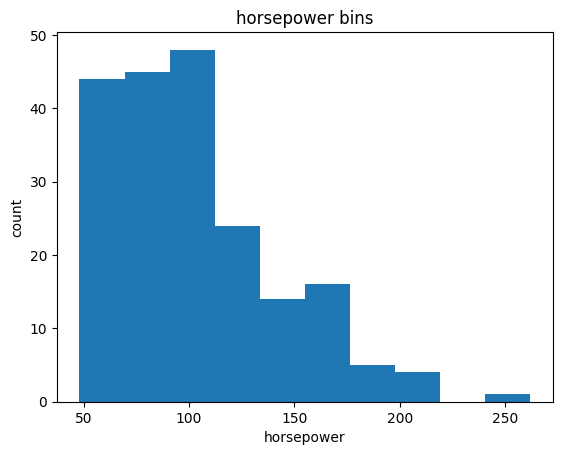

In [93]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Find 3 bins of equal size bandwidth by using Numpy's linspace(start_value, end_value, numbers_generated function.

Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).

Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).

Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.

Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [94]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [95]:
# set group names
group_names = ['Low', 'Medium', 'High']

In [96]:
# Apply the function "cut" to determine what each value of df['horsepower'] belongs to. 
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

horsepower horsepower-binned
0          111               Low
1          111               Low
2          154            Medium
3          102               Low
4          115               Low
5          110               Low
6          110               Low
7          110               Low
8          140            Medium
9          101               Low
10         101               Low
11         121            Medium
12         121            Medium
13         121            Medium
14         182            Medium
15         182            Medium
16         182            Medium
17          48               Low
18          70               Low
19          70               Low

In [97]:
# See the number of vehicles in each bin:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

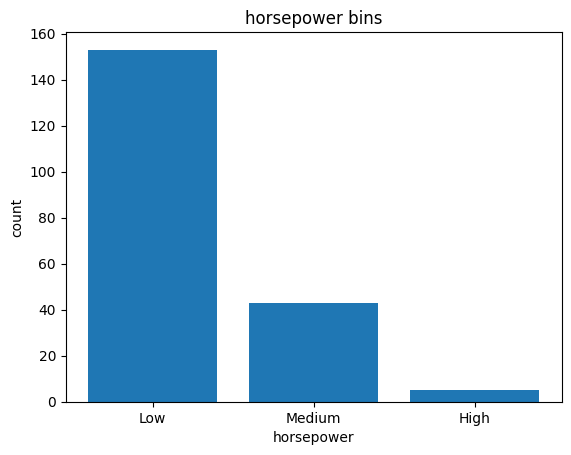

In [98]:
# Plot the distribution of each bin:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Look at the data frame below carefully. 
# You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").
# You successfully narrowed down the intervals from 59 to 3!


### Bins Visualization
Normally, you use a histogram to visualize the distribution of bins we created above. 

Text(0.5, 1.0, 'horsepower bins')

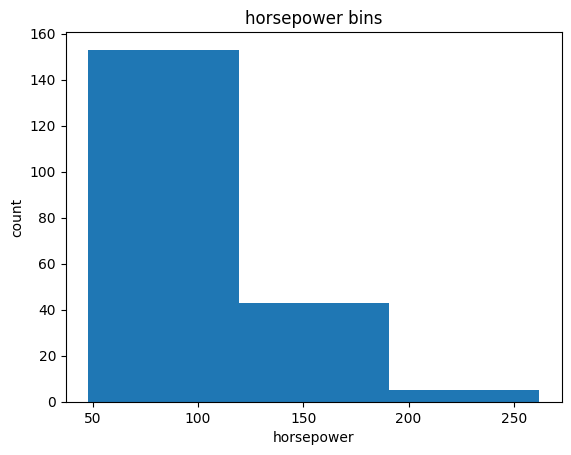

In [99]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator Variable

What is an indicator variable?

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why use indicator variables?

You use indicator variables so you can use categorical variables for regression analysis in the later modules.
Example

The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.

Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [100]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [101]:
# Get the indicator variables and assign it to data frame "dummy_variable_1":

dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

diesel   gas
0   False  True
1   False  True
2   False  True
3   False  True
4   False  True

In [102]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

fuel-type-diesel  fuel-type-gas
0             False           True
1             False           True
2             False           True
3             False           True
4             False           True

In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.


In [103]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [104]:
df.head()


symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   horsepower  peak-rpm  city-mpg highway-mpg    price  city-L/100km  \
0         111    5000.0        21          27  13495.0     11.190476   
1         111    5000.0        21          27  16500.0     11.190476   
2         154    5000.0        19          26  16500.0     12.368421   
3         102    5500.0        24          30  13950.0      9.791667   
4         115    5500.0        18          22  17450.0     13.055556   

  highway-L/100km  horsepower-binned  fuel-type-diesel  fuel-type-gas  
0        8.703704                Low             False           True  
1        8.703704                Low             False           True  
2        9.038462             Medium             False           True  
3        7.833333                Low             False           True  
4       10.681818                Low             False           True  

[5 rows x 30 columns]

### Question #4:

Similar to before, create an indicator variable for the column "aspiration"

In [105]:
# Get the indicator variables and assign it to data frame "dummy_variable_2":

dummy_variable_2 = pd.get_dummies(df["aspiration"])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

aspiration-std  aspiration-turbo
0            True             False
1            True             False
2            True             False
3            True             False
4            True             False

### Question #5:

Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.

In [106]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)



Save the new csv:


In [107]:
df.to_csv('clean_df.csv')

## Hands-on Practice Lab: Data Wrangling (Laptop Pricing)

Estimated time needed: 30 minutes

In this lab, you will use the skills acquired in the module and address the issues of handling missing data, correct the data type of the dataframe attribute and execute the processes of data standardization and data normalization on specific attributes of the dataset.

### Objectives

After completing this lab you will be able to:

    Handle missing data in different ways
    Correct the data type of different data values as per requirement
    Standardize and normalize the appropriate data attributes
    Visualize the data as grouped bar graph using Binning
    Cnverting a categorical data into numerical indicator variables

### Setup

For this lab, we will be using the following libraries:

    skillsnetwork to download the dataset
    pandas for managing the data.
    numpy for mathematical operations.
    matplotlib for additional plotting tools.



Importing Required Libraries

We recommend you import all required libraries in one place (here):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# URL of the dataset
file_path1= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

# Column headers for the dataset
# headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
#          "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
#          "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
#          "peak-rpm","city-mpg","highway-mpg","price"]

# Read CSV directly from URL (pandas can handle URLs directly)
df = pd.read_csv(file_path1)

# Display first few rows
df.head()

Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [4]:
# Note that we can update the Screen_Size_cm column such that all values are rounded to nearest 2 decimal places 
# by using numpy.round()

df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           35.56            1.6       8             256       1.60    978  
1           39.62            2.0       4             256       2.20    634  
2           39.62            2.7       8             256       2.20    946  
3           33.78            1.6       8             128       1.22   1244  
4           39.62            1.8       8             256       1.91    837

### Task - 1
Evaluate the dataset for missing data

Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 

In [5]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    #print(column)
    print (missing_data[column].value_counts())
    print("") 

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: in

### Task - 2
Replace with mean

Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.


In [6]:
# replacing missing data with mean
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

Replace with the most frequent value

Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.


In [7]:
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

### Task - 3
Fixing the data types

Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [8]:
print(df.dtypes['Weight_kg'])
print(df.dtypes['Screen_Size_cm'])

# Data type of weight_kg and screen_size_cm is float as checked in print(df.info()) already so no need to change it.

float64
float64


### Task - 4
Data Standardization

The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

1 inch = 2.54 cm
1 kg   = 2.205 pounds

In [9]:
# Converting Weight_kg to Weight_pounds :-

df['Weight_pounds'] = df['Weight_kg']*2.205
df['Weight_pounds'] = np.round(df['Weight_pounds'],2)

# Converting Screen_Size_cm to Screen_Size_inch 
df['Screen_Size_inch'] = df['Screen_Size_cm']/2.54
df['Screen_Size_inch'] = np.round(df['Screen_Size_inch'],2)
df.head()

Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  \
0           35.56            1.6       8             256       1.60    978   
1           39.62            2.0       4             256       2.20    634   
2           39.62            2.7       8             256       2.20    946   
3           33.78            1.6       8             128       1.22   1244   
4           39.62            1.8       8             256       1.91    837   

   Weight_pounds  Screen_Size_inch  
0           3.53              14.0  
1           4.85              15.6  
2           4.85              15.6  
3           2.69              13.3  
4           4.21              15.6

### Data Normalization

Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [10]:
#Click here for Solution

df['CPU_freq_Norm'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [11]:
df.head()

Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  \
0           35.56            1.6       8             256       1.60    978   
1           39.62            2.0       4             256       2.20    634   
2           39.62            2.7       8             256       2.20    946   
3           33.78            1.6       8             128       1.22   1244   
4           39.62            1.8       8             256       1.91    837   

   Weight_pounds  Screen_Size_inch  CPU_freq_Norm  
0           3.53              14.0       0.551724  
1           4.85              15.6       0.689655  
2           4.85              15.6       0.931034  
3           2.69              13.3       0.551724  
4           4.21              15.6       0.620690

### Task - 5
Binning

Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64 [ 527.         1621.33333333 2715.66666667 3810.        ]


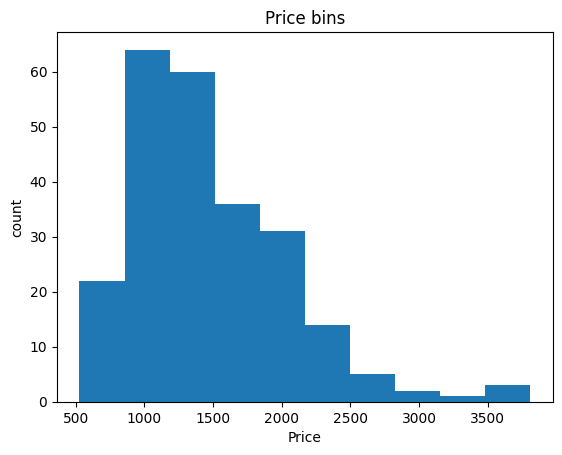

In [12]:
# Visual Examination of Price in histogram chart:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Price"])

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

# bins creation
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
bins

# set group names
group_names = ['Low', 'Medium', 'High']

# Apply the function "cut" to determine what each value of df['Price'] belongs to. 
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )
df[['Price','Price-binned']].head(20)

# See the number of Prices in each bin:
Price_bins_counts = df["Price-binned"].value_counts()


print(Price_bins_counts,bins)

Also, plot the bar graph of these bins.

Text(0.5, 1.0, 'Price bins')

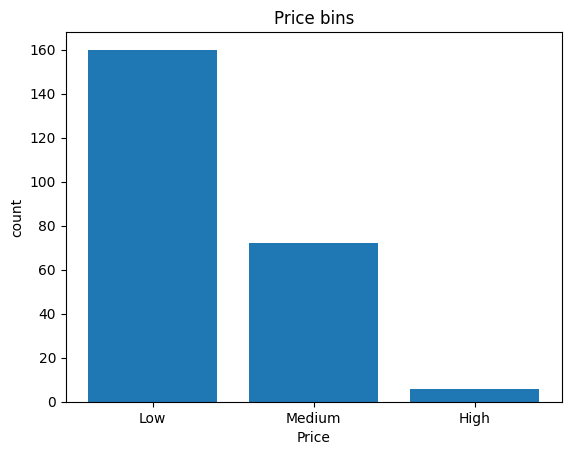

In [13]:
# Plot the distribution of each bin:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

### Task - 6
Indicator variables

Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [14]:
df.columns



Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_kg', 'Price', 'Weight_pounds',
       'Screen_Size_inch', 'CPU_freq_Norm', 'Price-binned'],
      dtype='object')

In [15]:
# Indicator Variable: Screen
dummy_variable_2 = pd.get_dummies(df["Screen"])

dummy_variable_2.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)

dummy_variable_2.head()


Screen-Full_HD  Screen-IPS_panel
0           False              True
1            True             False
2            True             False
3           False              True
4            True             False

In [16]:
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "Screen" from "df"

df.drop("Screen", axis = 1, inplace=True)

In [17]:
df.head()

Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_cm  \
0           0         Acer         4    2   1         5           35.56   
1           1         Dell         3    1   1         3           39.62   
2           2         Dell         3    1   1         7           39.62   
3           3         Dell         4    2   1         5           33.78   
4           4           HP         4    2   1         7           39.62   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  Weight_pounds  \
0            1.6       8             256       1.60    978           3.53   
1            2.0       4             256       2.20    634           4.85   
2            2.7       8             256       2.20    946           4.85   
3            1.6       8             128       1.22   1244           2.69   
4            1.8       8             256       1.91    837           4.21   

   Screen_Size_inch  CPU_freq_Norm Price-binned  Screen-Full_HD  \
0              14.0       0.551724          Low           False   
1              15.6       0.689655          Low            True   
2              15.6       0.931034          Low            True   
3              13.3       0.551724          Low           False   
4              15.6       0.620690          Low            True   

   Screen-IPS_panel  
0              True  
1             False  
2             False  
3              True  
4             False

In [18]:
df

Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_cm  \
0             0         Acer         4    2   1         5           35.56   
1             1         Dell         3    1   1         3           39.62   
2             2         Dell         3    1   1         7           39.62   
3             3         Dell         4    2   1         5           33.78   
4             4           HP         4    2   1         7           39.62   
..          ...          ...       ...  ...  ..       ...             ...   
233         233       Lenovo         4    2   1         7           35.56   
234         234      Toshiba         3    2   1         5           33.78   
235         235       Lenovo         4    2   1         5           30.48   
236         236       Lenovo         3    3   1         5           39.62   
237         237      Toshiba         3    2   1         5           35.56   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  Weight_pounds  \
0              1.6       8             256       1.60    978           3.53   
1              2.0       4             256       2.20    634           4.85   
2              2.7       8             256       2.20    946           4.85   
3              1.6       8             128       1.22   1244           2.69   
4              1.8       8             256       1.91    837           4.21   
..             ...     ...             ...        ...    ...            ...   
233            2.6       8             256       1.70   1891           3.75   
234            2.4       8             256       1.20   1950           2.65   
235            2.6       8             256       1.36   2236           3.00   
236            2.5       6             256       2.40    883           5.29   
237            2.3       8             256       1.95   1499           4.30   

     Screen_Size_inch  CPU_freq_Norm Price-binned  Screen-Full_HD  \
0                14.0       0.551724          Low           False   
1                15.6       0.689655          Low            True   
2                15.6       0.931034          Low            True   
3                13.3       0.551724          Low           False   
4                15.6       0.620690          Low            True   
..                ...            ...          ...             ...   
233              14.0       0.896552       Medium           False   
234              13.3       0.827586       Medium            True   
235              12.0       0.896552       Medium           False   
236              15.6       0.862069          Low            True   
237              14.0       0.793103          Low            True   

     Screen-IPS_panel  
0                True  
1               False  
2               False  
3                True  
4               False  
..                ...  
233              True  
234             False  
235              True  
236             False  
237             False  

[238 rows x 18 columns]